# Feature Extraction and Waveform Clustering

## 1 Preparation

Import the modules required for this notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

Download the data required for this session

In [2]:
import requests

url = "https://uni-bonn.sciebo.de/s/aFQ1gcUbOHRDEtP"
fname = "spike_waveforms.npy"
response = requests.get(f"{url}/download")
print("Downloading Data ...")
with open(fname, "wb") as file:
    file.write(response.content)
print("Done!")

Done!

## 2 Extracting Waveform Features with PCA

In principal, we could run spike sorting on the raw spike waveforms.
However, because there are too many features (i.e., time points) in the
data and they are highly correlated, the sorting process would be very
inefficient. Thus, we’ll have to extract features from the waveforms and
use those to sort the spikes. Principal Component Analysis (PCA) is a
method that allows us to extract these features in an automated and
unsupervised manner. PCA will give us a number of uncorrelated
components that provide a concise description of our data. This way, we
can drastically reduce the number of dimensions while keeping the most
relevant information. In this section, we will learn how to apply PCA to
the raw spike waveforms.

| Code | Description |
|------------------------------------|------------------------------------|
| `waveforms = np.load("data.npy")` | Load a NumPy array from a `.npy` file. |
| `waveforms.shape` | Get the dimensions (shape) of the `waveforms` NumPy array. |
| `X = waveforms[:, :, 0]` | Select all data from the first channel (index 0) of the 3D `waveforms` array. |
| `pca = PCA(n_components=n)` | Create a Principal Component Analysis (PCA) object to find `n` components. |
| `X_transformed = pca.fit_transform(X)` | Fit the PCA model to data `X` and apply dimensionality reduction. |
| `pca.explained_variance_ratio_` | Get the percentage of variance explained by each principal component. |
| `plt.plot(data)` | Plot the values in the `data` array as a line graph. |
| `np.cumsum(array)` | Calculate the cumulative sum of the elements in an array. |
| `sum(array[:n])` | Calculate the sum of the first `n` elements of an array. |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 1**</span> Load the array of of
spike waveforms stored in `"spike_waveforms.npy"`, assign it to a
variable `waveforms` print its `.shape`. How many spikes are stored in
the array?

*Solution.*

In [3]:
waveforms = np.load("spike_waveforms.npy")
waveforms.shape

(19482, 30, 4)

<span class="theorem-title">**Example 1**</span> Use `PCA` with
`n_components=5` to transform the spike waveforms recorded at the first
channel.

In [5]:
X = waveforms[:, :, 0]
pca = PCA(n_components=5)
X_transformed = pca.fit_transform(X)

<span class="theorem-title">**Exercise 2**</span> Use `PCA` with
`n_components=7` to transform the spike waveforms recorded at the first
channel. Compare the `.shape` of the original and the transformed data.

*Solution.*

In [6]:
X = waveforms[:, :, 0]
pca = PCA(n_components=7)
X_transformed = pca.fit_transform(X)
print(X.shape, X_transformed.shape)

(19482, 30) (19482, 7)

<span class="theorem-title">**Exercise 3**</span> Use `PCA` with
`n_components=15` to transform the spike waveforms recorded at the first
channel. Compare the `.shape` of the original and the transformed data.

*Solution.*

In [8]:
X = waveforms[:, :, 0]
pca = PCA(n_components=15)
X_transformed = pca.fit_transform(X)
print(X.shape, X_transformed.shape)

(19482, 30) (19482, 15)

<span class="theorem-title">**Exercise 4**</span> What error message do
you observe when you try to apply `PCA` with `n_components=40`?

*Solution.*

`ValueError: n_components=40 must be between 0 and min(n_samples,n_features)=30`

<span class="theorem-title">**Exercise 5**</span> Plot the ratio of
variance explained by the PCA components
(i.e. `pca.explained_variance_ratio_`)

*Solution.*

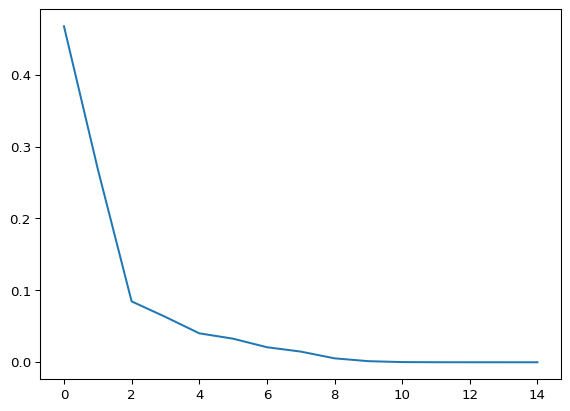

In [11]:
plt.plot(pca.explained_variance_ratio_)

<span class="theorem-title">**Exercise 6**</span> Compute the cumulative
ratio of explained variance using `np.cumsum()` and plot it

*Solution.*

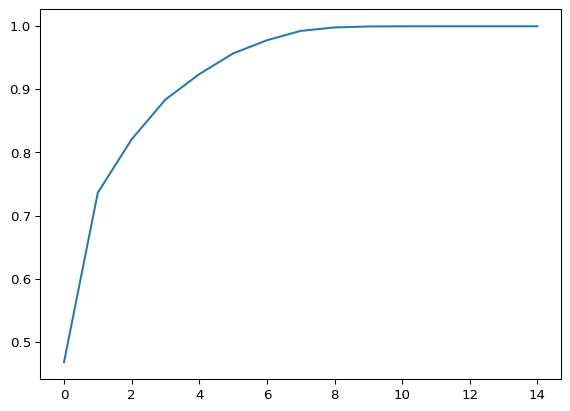

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

<span class="theorem-title">**Exercise 7**</span> What ratio of the
variance is explained by the first three components (i.e. what is the
`sum()` of the first three elements of `.explained_variance_ratio_`?)
and how many components are required to account for over 99% of
variance?

*Solution.*

In [15]:
print(sum(pca.explained_variance_ratio_[:3]))
print(sum(pca.explained_variance_ratio_[:8]))

0.8207594766285907
0.9926894524591812

<span class="theorem-title">**Exercise 8**</span> Fit a PCA with
`n_components=15` to the waveforms recorded at the second channel, then
compute and plot the PCA component’s cumulative ratio of explained
variance.

*Solution.*

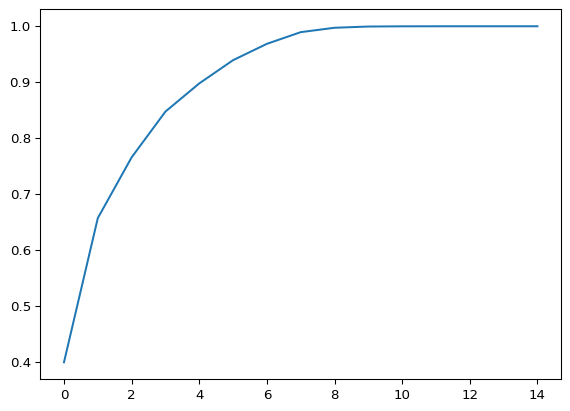

In [17]:
X = waveforms[:, :, 1]
pca = PCA(n_components=15)
X_transformed = pca.fit_transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## 3 Visualizing Principal Components

PCA is a powerful technique, but its components can be abstract. To
build intuition, it’s helpful to visualize what these components
represent in relation to the original data. In this section, we will
plot the principal components themselves to see what waveform shapes
they capture. We will also use the inverse PCA transformation to
reconstruct waveforms from a limited number of components, which
demonstrates how much information is retained. Finally, we will plot the
transformed data in the new low-dimensional “PCA space,” which should
already begin to reveal the distinct clusters of spikes we aim to
identify.mprehend. In this section, we are going to visualize the
extracted components and compare them to the original waveform to
understand how they relate to each other. We’ll also apply PCA to
transform the original waveforms and plot the transformed waveforms in
the new PCA-space. This visualization should already reveal some of the
clusters that we want to identify later.

| Code | Description |
|------------------------------------|------------------------------------|
| `pca.components_` | Access the principal components (eigenvectors) from a fitted PCA model. |
| `X_inverse = pca.inverse_transform(X_transformed)` | Transform data from PCA space back to its original space. |
| `plt.subplot(rows, cols, index)` | Create a subplot within a grid at a given `index`. |
| `X.T` | Transpose the matrix `X`, swapping its rows and columns. |
| `np.zeros((d1, d2, d3))` | Create a new NumPy array with specified dimensions, filled with zeros. |
| `plt.scatter(x, y, s=1)` | Create a scatter plot of `x` vs. `y` with a marker size `s` of 1. |
| `plt.xlabel("label")` | Set the label for the x-axis of a plot. |
| `plt.ylabel("label")` | Set the label for the y-axis of a plot. |

------------------------------------------------------------------------

<span class="theorem-title">**Example 2**</span> Fit a `PCA` with
`n_components=3` to the waveforms recorded at the first channel and plot
the first component, along with the first 100 recorded waveforms.

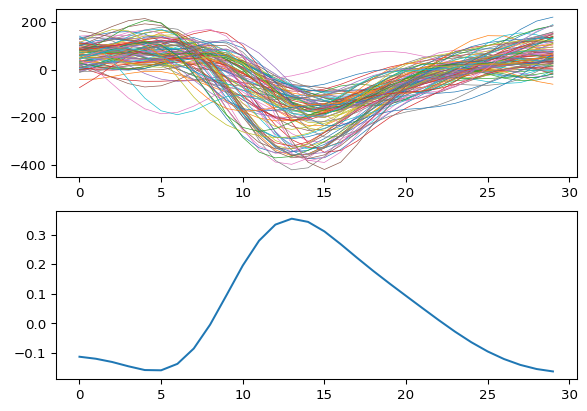

In [19]:
X = waveforms[:, :, 0]
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)
plt.subplot(2, 1, 1)
plt.plot(X[:100].T, linewidth=0.5)
plt.subplot(2, 1, 2)
plt.plot(pca.components_[0])

<span class="theorem-title">**Exercise 9**</span> Plot the second and
third principle component along with the first 100 waveforms recorded at
the first channel.

*Solution.*

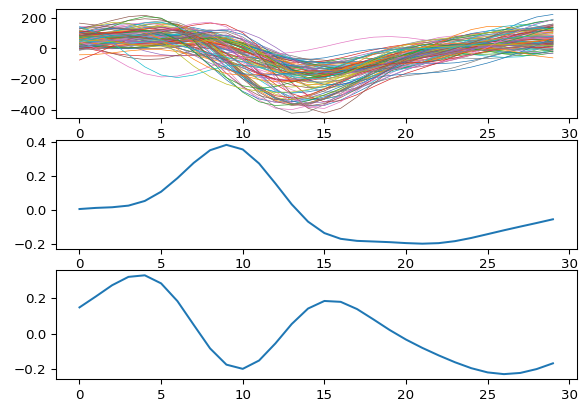

In [20]:
plt.subplot(3, 1, 1)
plt.plot(X[:100].T, linewidth=0.5)
plt.subplot(3, 1, 2)
plt.plot(pca.components_[1])
plt.subplot(3, 1, 3)
plt.plot(pca.components_[2])

<span class="theorem-title">**Exercise 10**</span> Fit a `PCA` with
`n_components=3` to the waveforms recorded at the third channel and plot
the first component, along with the first 100 recorded waveforms.

*Solution.*

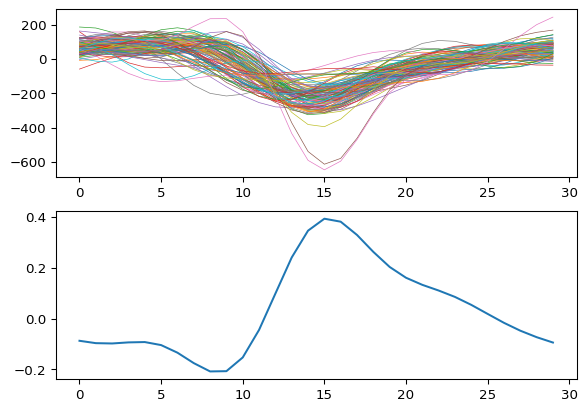

In [22]:
X = waveforms[:, :, 2]
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)
plt.subplot(2, 1, 1)
plt.plot(X[:100].T, linewidth=0.5)
plt.subplot(2, 1, 2)
plt.plot(pca.components_[0])

<span class="theorem-title">**Example 3**</span> Compute a `PCA` with
`n_components=1` for the waveforms recorded at the first channel and
transform the data. Then, compute the `.inverse_transfom()` of the
transformed data and plot the result of the inverse transformation
`X_inverse` along with the original data `X` for the first spike.

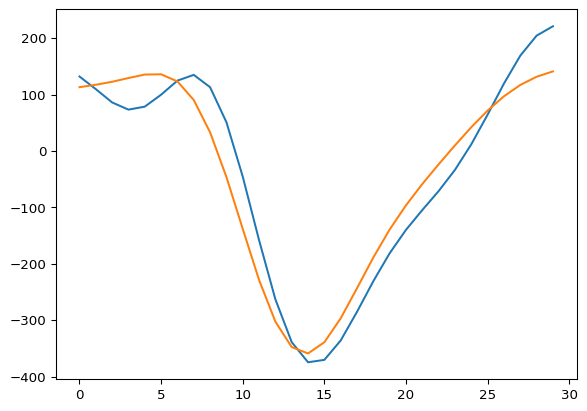

In [24]:
X = waveforms[:, :, 0]
pca = PCA(n_components=1)
X_transformed = pca.fit_transform(X)
X_inverse = pca.inverse_transform(X_transformed)
plt.plot(X[0])
plt.plot(X_inverse[0])

<span class="theorem-title">**Exercise 11**</span> Plot the original
data `X` and the result of the inverse transformation `X_inverse` for
the 7th spike.

*Solution.*

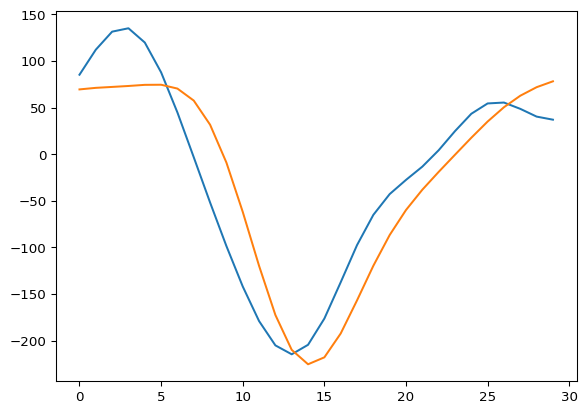

In [25]:
plt.plot(X[6])
plt.plot(X_inverse[6])

<span class="theorem-title">**Exercise 12**</span> Re-compute the `PCA`
and increase the number of `n_components`, then `fit_transform` and
`inverse_transform` the data. How many components do you need so the
original data `X` and `X_inverse` become indistinguishable?

*Solution.*

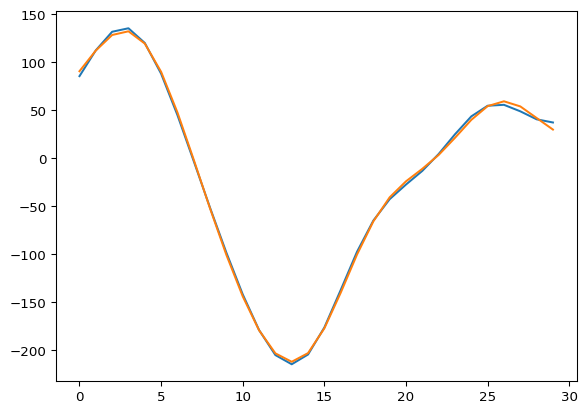

In [27]:
X = waveforms[:, :, 0]
pca = PCA(n_components=9)
X_transformed = pca.fit_transform(X)
X_inverse = pca.inverse_transform(X_transformed)
plt.plot(X[6])
plt.plot(X_inverse[6])

<span class="theorem-title">**Exercise 13**</span> Complete the `for`
loop below by computing `X_transformed` for the spike waveforms `X` at
each channel `i`.

In [29]:
n_components = 3
pca = PCA(n_components=n_components)
n_spikes = waveforms.shape[0]
n_channels = waveforms.shape[-1]
waveforms_transformed = np.zeros((n_spikes, n_components, n_channels))

for i in range(n_channels):
    X = waveforms[:, :, i]
    X_transformed = # your code here 
    waveforms_transformed[:, :, i] = X_transformed

*Solution.*

In [30]:
n_components = 3
pca = PCA(n_components=n_components)
n_spikes = waveforms.shape[0]
n_channels = waveforms.shape[-1]
waveforms_transformed = np.zeros((n_spikes, n_components, n_channels))
for i in range(n_channels):
    X = waveforms[:, :, i]
    X_transformed = pca.fit_transform(X)
    waveforms_transformed[:, :, i] = X_transformed

<span class="theorem-title">**Example 4**</span> Plot the amplitude of
the 1st PCA feature at the channel 1 against the amplitude at the
channel 2 for all spikes (each spike is one dot).

Text(0, 0.5, 'Ch 2 Amplitude [a.u.]')

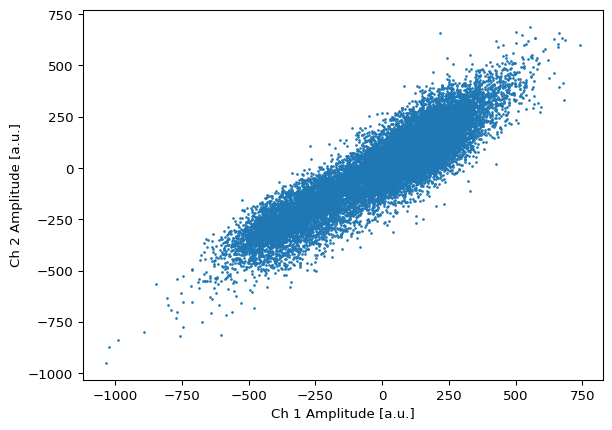

In [32]:
plt.scatter(waveforms_transformed[:, 0, 0], waveforms_transformed[:, 0, 1], s=1)
plt.xlabel("Ch 1 Amplitude [a.u.]")
plt.ylabel("Ch 2 Amplitude [a.u.]")

<span class="theorem-title">**Exercise 14**</span> Plot the amplitude of
the 1st PCA feature at channel 1 against the amplitude at channel 3 for
all spikes. Can you visually identify clusters that the individual
spikes may fall into?

*Solution.*

Text(0, 0.5, 'Ch 3 Amplitude [a.u.]')

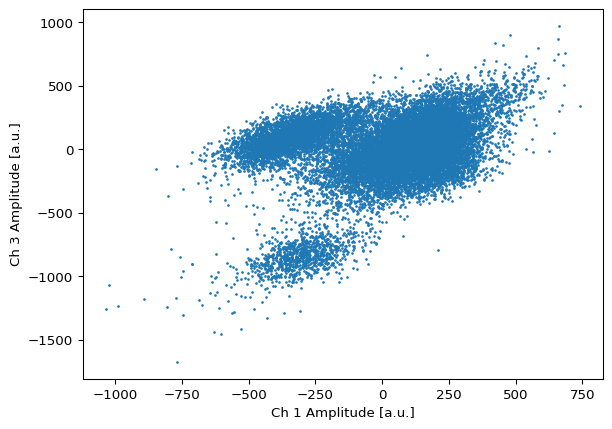

In [33]:
plt.scatter(waveforms_transformed[:, 0, 0], waveforms_transformed[:, 0, 2], s=1)
plt.xlabel("Ch 1 Amplitude [a.u.]")
plt.ylabel("Ch 3 Amplitude [a.u.]")

<span class="theorem-title">**Exercise 15**</span> Plot the amplitude of
the 1st PCA feature at channel 3 against the amplitude at channel 4 for
all spikes. Can you visually identify clusters that the individual
spikes may fall into?

*Solution.*

Text(0, 0.5, 'Ch 4 Amplitude [a.u.]')

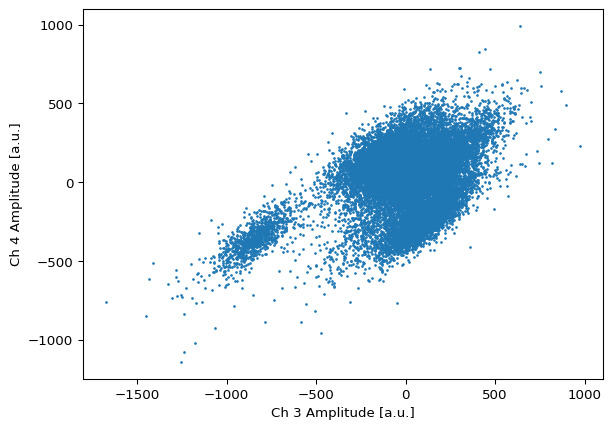

In [35]:
plt.scatter(waveforms_transformed[:, 0, 2], waveforms_transformed[:, 0, 3], s=1)
plt.xlabel("Ch 3 Amplitude [a.u.]")
plt.ylabel("Ch 4 Amplitude [a.u.]")

## 4 Clustering Spikes with Gaussian Mixture Models

Now that we have extracted low-dimensional features from our waveforms
using PCA, we can perform clustering to group spikes into putative
single units. We will use a Gaussian Mixture Model (GMM), a
probabilistic model that assumes the data is generated from a mixture of
a finite number of Gaussian distributions with unknown parameters. A key
challenge in clustering is choosing the right number of clusters. To
address this, we will use the Bayesian Information Criterion (BIC), a
model selection tool that balances model fit with model complexity. A
lower BIC score indicates a better model, helping us avoid overfitting
by penalizing models with too many clusters.

| Code | Description |
|------------------------------------|------------------------------------|
| `X.reshape(-1, n_cols, order="F")` | Reshape an array into a 2D matrix with `n_cols` columns. |
| `gmm = GaussianMixture(n_components=n)` | Create a Gaussian Mixture Model (GMM) object to find `n` clusters. |
| `gmm.fit(X)` | Fit the GMM to the data `X` to learn the cluster parameters. |
| `gmm.score(X)` | Compute the average log-likelihood of the data `X` under the model. |
| `gmm.bic(X)` | Compute the Bayesian Information Criterion (BIC) for the fitted model. |

<span class="theorem-title">**Exercise 16**</span> Execute the cell
below to `.reshape()` the 3-dimensional matrix `waveforms_transformed`
into a 2-dimensional matrix `X` by concatenating the components and
channels dimension. What is the new `.shape` of `X`?

In [37]:
X = waveforms_transformed.reshape(-1, n_components * n_channels, order="F")

*Solution.*

In [38]:
X.shape

(19482, 12)

<span class="theorem-title">**Example 5**</span> Apply a
`GaussianMixture` model with `n_components=5` to the first `1000` spikes
in `waveforms` and compute the models `.score()` (i.e. the log
likelihood).

In [40]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X[:1000])
gmm.score(X[:1000])

-69.68972234184542

<span class="theorem-title">**Exercise 17**</span> Apply a
`GaussianMixture` model with `n_components=10` to the first `1000`
spikes in `waveforms` and compute the models `.score()`. Is this model
more accurate than the model with `n_components=5`?

*Solution.*

In [41]:
gmm = GaussianMixture(n_components=10)
gmm.fit(X[:1000])
gmm.score(X[:1000])

-69.23102730755396

<span class="theorem-title">**Exercise 18**</span> Apply a
`GaussianMixture` model with `n_components=100` to the first `1000`
spikes in `waveforms` and compute the models `.score()`. Will the
model’s accuracy always increase with the number of components? What is
the largest number of components possible for this model?

*Solution.*

In [43]:
gmm = GaussianMixture(n_components=100)
gmm.fit(X[:1000])
gmm.score(X[:1000])

-42.478974806912944

The largest number of components is equal to the number of data points,
i.e. 1000

<span class="theorem-title">**Exercise 19**</span> Apply a
`GaussianMixture` model with `n_components=10` to the first `1000`
spikes in `waveforms` and compute the Bayesian Information Criterion
`.bic()`.

*Solution.*

In [45]:
gmm = GaussianMixture(n_components=10)
gmm.fit(X[:1000])
gmm.bic(X[:1000])

144716.89085221363

<span class="theorem-title">**Exercise 20**</span> Apply a
`GaussianMixture` model with `n_components=5` to the first `1000` spikes
in `waveforms` and compute the Bayesian Information Criterion `.bic()`.
Does this model perform better or worse than the one with
`n_components=10` according to the BIC (HINT: a lower BIC indicates a
better model)?

*Solution.*

In [47]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X[:1000])
gmm.bic(X[:1000])

142698.60559651215

<span class="theorem-title">**Exercise 21**</span> Increase the number
of spikes the `GaussianMixture` model is fit on to `8000`. Which model
performs better now, the one with 5 or 10 components?

*Solution.*

In [49]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X[:8000])
print(gmm.bic(X[:8000]))
gmm = GaussianMixture(n_components=10)
gmm.fit(X[:8000])
print(gmm.bic(X[:8000]))

1120764.2699639685
1118475.648618964

<span class="theorem-title">**Exercise 22**</span> Fit a
`GaussianMixture` model with `n_components=13` (which is the optimal
number of components according to BIC) to the whole data.

*Solution.*

In [51]:
gmm = GaussianMixture(
    n_components=13,
)
gmm.fit(X)

GaussianMixture(n_components=13) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GaussianMixture ? Documentation for GaussianMixture i Fitted GaussianMixture(n_components=13)

## 5 Predicting and Inspecting Cluster Labels

With an optimal GMM fitted to our data, we can now assign each spike to
a specific cluster. These cluster assignments are our predicted single
units. To validate the quality of our clustering, we will inspect the
results both quantitatively and visually. We will examine the
probability of each spike’s cluster assignment to gauge the model’s
confidence. Finally, we will visualize the clusters in the PCA feature
space, coloring each spike by its assigned label to see if the clusters
are well-separated, which is a key indicator of successful spike
sorting.

| Code | Description |
|------------------------------------|------------------------------------|
| `spike_labels = gmm.predict(X)` | Predict the cluster label for each sample in `X` using the fitted GMM. |
| `cluster_probs = gmm.predict_proba(X)` | Predict the probability of each sample belonging to each cluster. |
| `np.unique(array)` | Find and return the unique elements in an array. |
| `len(array)` | Get the number of elements in an array or list. |
| `sum(array == value)` | Count the number of elements in an array equal to a specific `value`. |
| `plt.hist(data)` | Create a histogram to visualize the distribution of values in `data`. |
| `array.max(axis=1)` | Find the maximum value for each row of a 2D array. |
| `plt.scatter(x, y, s=5, color="gray")` | Create a scatter plot with a specified marker size `s` and `color`. |
| `plt.legend()` | Display a legend on the plot to identify different data series. |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 23**</span> Use `gmm.predict` to
predict the `spike_labels` for the data `X` and print them.

*Solution.*

In [53]:
spike_labels = gmm.predict(X)
spike_labels

array([ 2,  5,  9, ...,  2,  2, 12])

<span class="theorem-title">**Exercise 24**</span> How many unique
`spike_labels` are there?

*Solution.*

In [55]:
print(len(np.unique(spike_labels)))

13

<span class="theorem-title">**Exercise 25**</span> Use
`gmm.predict_proba` to predict the `cluster_probs` for `X` (i.e. the
probabilities that each element in `X` belongs to a given cluster) and
print their shape.

*Solution.*

In [57]:
cluster_probs = gmm.predict_proba(X)
cluster_probs.shape

(19482, 13)

<span class="theorem-title">**Exercise 26**</span> What is the
`spike_label` assigned to the first spike? How many spikes have been
assigned to the same label?

*Solution.*

In [59]:
print(spike_labels[0])
sum(spike_labels==spike_labels[0])

2

3058

<span class="theorem-title">**Exercise 27**</span> Plot the probability
of cluster membership `cluster_prob` for the first spike as a histogram.

*Solution.*

(array([11.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.35683078e-53, 7.76413885e-02, 1.55282777e-01, 2.32924166e-01,
        3.10565554e-01, 3.88206943e-01, 4.65848331e-01, 5.43489720e-01,
        6.21131108e-01, 6.98772497e-01, 7.76413885e-01]),
 <BarContainer object of 10 artists>)

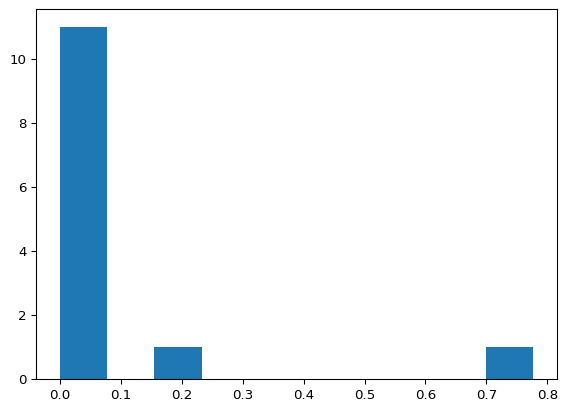

In [61]:
plt.hist(cluster_probs[0])

<span class="theorem-title">**Exercise 28**</span> What is the sum of
all `cluster_probs` for a the first spike?

*Solution.*

In [63]:
sum(cluster_probs[0])

0.9999999999999933

<span class="theorem-title">**Exercise 29**</span> Get the largest
cluster membership probability for each spike
(i.e. `cluster_probs.max(axis=1)` and plot them in a histogram.

*Solution.*

(array([2.0000e+00, 4.8000e+01, 1.8200e+02, 5.9900e+02, 1.1810e+03,
        1.2090e+03, 1.3560e+03, 1.6450e+03, 2.2940e+03, 1.0966e+04]),
 array([0.19045276, 0.27140749, 0.35236221, 0.43331693, 0.51427166,
        0.59522638, 0.6761811 , 0.75713583, 0.83809055, 0.91904528,
        1.        ]),
 <BarContainer object of 10 artists>)

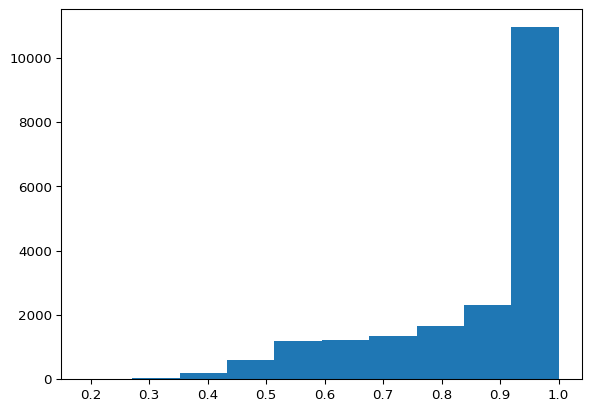

In [65]:
plt.hist(cluster_probs.max(axis=1))

<span class="theorem-title">**Example 6**</span> Plot the amplitude of
PCA feature at channel 1 (`X[:, 0, 0]`) against the amplitude at channel
2 (`X[:, 0, 1]`) for the spikes from `clusters=[0, 1, 2, 3]`

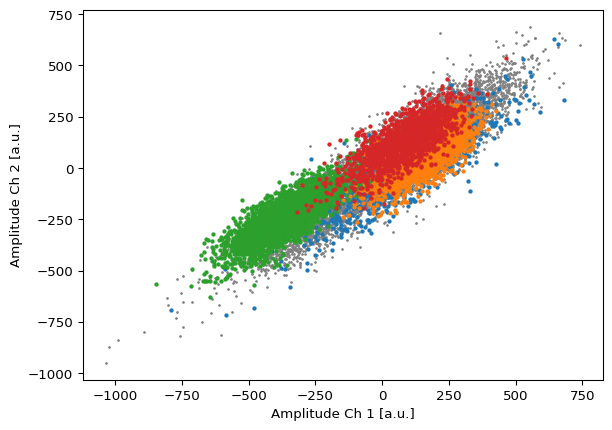

In [67]:
clusters = [0, 1, 2, 3]
X = waveforms_transformed
plt.scatter(X[:, 0, 0], X[:, 0, 1], s=1, color="gray")
for cluster in clusters:
    X = waveforms_transformed[spike_labels == cluster]
    plt.scatter(X[:, 0, 0], X[:, 0, 1], s=5)
    plt.xlabel("Amplitude Ch 1 [a.u.]")
    plt.ylabel("Amplitude Ch 2 [a.u.]")

<span class="theorem-title">**Exercise 30**</span> Plot the amplitude of
PCA feature at channel 1 (`X[:, 0, 0]`) against the amplitude at channel
3 (`X[:, 0, 2]`) for the spikes from `clusters=[0, 1, 2, 3]`.

*Solution.*

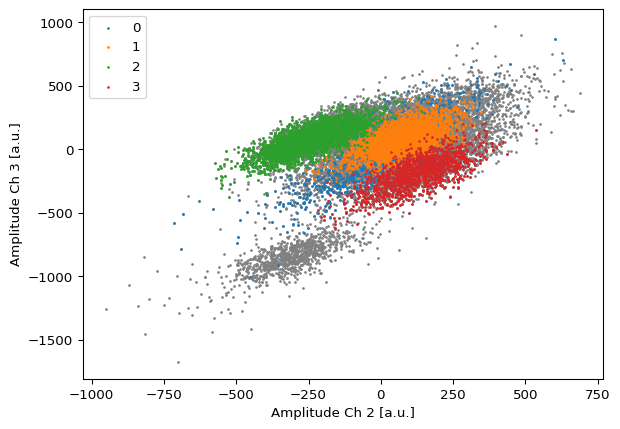

In [68]:
clusters = [0, 1, 2, 3]
X = waveforms_transformed
plt.scatter(X[:, 0, 1], X[:, 0, 2], s=1, color="gray")
for cluster in clusters:
    X = waveforms_transformed[spike_labels == cluster]
    plt.scatter(X[:, 0, 1], X[:, 0, 2], s=1, label=cluster)
    plt.xlabel("Amplitude Ch 2 [a.u.]")
    plt.ylabel("Amplitude Ch 3 [a.u.]")
plt.legend()